# Analysis

In [2]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [192]:
from src.data_loading.psl import get_psl_indices

In [193]:
ds = get_psl_indices()

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
df = ds.to_dataframe()
# alt_pairplot(df)

In [197]:
import numpy.ma as ma
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def pairplot(df_tmp: pd.DataFrame) -> None:
    def corrfunc(x, y, ax=None, **kws):
        """Plot the correlation coefficient in the top left hand corner of a plot."""
        try:
            corr = ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))
            r = corr[0, 1]
        except:
            r = np.nan
        ax = ax or plt.gca()
        ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    g = sns.pairplot(df_tmp, corner=True)
    g.map_lower(corrfunc)
    plt.show()

df1 = df[["tni", "nino3.4", "meiv2", "soi"]]
pairplot(df1)

KeyError: "['nino3.4'] not in index"

In [198]:
ds

<xarray.Dataset>
Dimensions:  (time: 888)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-15 1948-02-15 ... 2021-12-15
Data variables:
    nino1+2  (time) float32 nan nan nan nan nan nan ... -0.3 -0.67 -0.79 nan nan
    nino3    (time) float32 nan nan nan nan nan ... -0.46 -0.44 -0.75 nan nan
    nino34   (time) float32 nan nan nan nan nan ... -0.51 -0.56 -0.95 nan nan
    nino4    (time) float32 nan nan nan nan nan ... -0.26 -0.53 -0.73 nan nan
    oni      (time) float32 nan nan nan nan nan nan ... -0.48 -0.67 nan nan nan
    tni      (time) float32 0.454 0.047 -0.135 -0.469 -0.95 ... nan nan nan nan
    soi      (time) float32 nan nan nan nan nan nan ... 2.3 1.0 1.3 1.2 nan nan
    meiv2    (time) float32 nan nan nan nan nan ... -1.34 -1.41 -1.47 nan nan
    best     (time) float32 0.26 0.43 0.72 0.21 0.24 ... -0.7 -1.04 nan nan
    hurr     (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan nan
    prcp     (time) float32 nan nan nan nan nan ... -1.254 -0.5527 nan nan
    pacwarm  (time) float32 -0.622 -0.549 -0.716 -0.609 ... 0.401 0.449 nan nan

In [137]:
from src.data_loading.psl import get_ersstv5
ersstv5 = get_ersstv5()

In [147]:
ersstv5

<xarray.DataArray 'sst' (time: 2014, lat: 89, lon: 180)>
[32264280 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-10-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [204]:
ersstv5_slim = ersstv5.sel(time=slice('1948', '2021'))

In [160]:
from src.xr_utils import can_coords, fix_calendar, sel
m, clim =nino_calculate(fix_calendar(can_coords(ersstv5_slim)))

warning, not changing:  variable


In [205]:
ersstv5_can = fix_calendar(can_coords(ersstv5_slim)).isel(variable=0)

In [206]:
m, clim =nino_calculate(ersstv5_can, reg="nino3.4")

In [215]:
psl_nino = ds["nino34"].sel(time=slice("1948", "2021-10")).values

In [213]:
my_nino = m.values

In [218]:
ma.corrcoef(ma.masked_invalid(my_nino), ma.masked_invalid(psl_nino))

masked_array(
  data=[[1.0, 0.9930262268868004],
        [0.9930262268868004, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [222]:
for x, y in [("nino34", "nino3.4"), ("nino4", "nino4"), ("nino1+2", "nino1+2")]:
    m, clim =nino_calculate(ersstv5_can, reg=y)
    my_nino = m.values
    psl_nino = ds[x].sel(time=slice("1948", "2021-10")).values
    print(ma.corrcoef(ma.masked_invalid(my_nino), ma.masked_invalid(psl_nino)))

[[1.0 0.9930262268868004]
 [0.9930262268868004 1.0]]
[[1.0 0.9925296993942325]
 [0.9925296993942325 1.0]]
[[1.0 0.9820494375705351]
 [0.9820494375705351 1.0]]


In [144]:
from src.metrics import nino_calculate

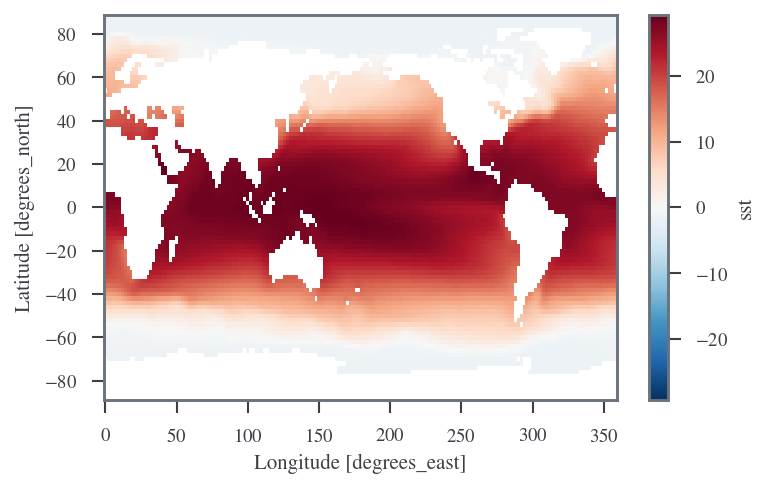

In [151]:
ersstv5.mean("time").plot()